# GeoHousing Model

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

from geo_housing.model import GeoHousing

In [2]:
#High
model = GeoHousing(has_regulation=True, 
                   rent_discount=0.2, 
                   base_decay_constant=0.15, 
                   decay_differential=0.15, 
                   init_num_people=2, 
                   num_month_rent_renovation = 5,
                   rent_increase_differential = 0.08,
                   max_complaint=5)

DEBUG:fiona.session:Could not import boto3, continuing with reduced functionality.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona.crs:Matched. confidence=100, c_code=b'4326', c_name=b'EPSG'
DEBUG:fiona.ogrext:OLC_FASTSETNEXTBYINDEX: 1
DEBUG:fiona.ogrext:OLC_FASTFEATURECOUNT: 1
DEBUG:fiona.ogrext:Next index: 0
DEBUG:fiona.ogrext:Next index: 1
DEBUG:fiona.ogrext:Next index: 2
DEBUG:fiona.ogrext:Next index: 3
DEBUG:fiona.ogrext:Next index: 4
DEBUG:fiona.ogrext:Next index: 5
DEBUG:fiona.ogrext:Next index: 6
DEBUG:fiona.ogrext:Next index: 7
DEBUG:fiona.ogrext:Next index: 8
DEBUG:fiona.ogrext:Next index: 9
DEBUG:fiona.ogrext:Next index: 10
DEBUG:fiona.ogrex

In [15]:
#Low
model2 = GeoHousing(rent_discount=0.5, base_decay_constant=0.15, decay_differential=0.05, init_num_people=2, max_complaint=3)

DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona.crs:Matched. confidence=100, c_code=b'4326', c_name=b'EPSG'
DEBUG:fiona.ogrext:OLC_FASTSETNEXTBYINDEX: 1
DEBUG:fiona.ogrext:OLC_FASTFEATURECOUNT: 1
DEBUG:fiona.ogrext:Next index: 0
DEBUG:fiona.ogrext:Next index: 1
DEBUG:fiona.ogrext:Next index: 2
DEBUG:fiona.ogrext:Next index: 3
DEBUG:fiona.ogrext:Next index: 4
DEBUG:fiona.ogrext:Next index: 5
DEBUG:fiona.ogrext:Next index: 6
DEBUG:fiona.ogrext:Next index: 7
DEBUG:fiona.ogrext:Next index: 8
DEBUG:fiona.ogrext:Next index: 9
DEBUG:fiona.ogrext:Next index: 10
DEBUG:fiona.ogrext:Next index: 11
DEBUG:fiona.ogrext:Next index: 12
DEBUG:fiona.ogrext:Next index: 13
DEBUG:fiona.ogrext:Next index: 14
DEBUG:fiona.ogrext:Next index: 15
DEBUG:fiona.ogrext:Next inde

We want to run the model until all the agents are happy with where they are. However, there's no guarantee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [3]:
while model.running and model.schedule.steps < 2:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

DEBUG:root:Household 98193273559850639969479920419746114081 Moved to BURNSIDE
DEBUG:root:Houshold 98193273559850639969479920419746114081 Trying to Move - Affordability
DEBUG:root:Region Rent Regulation is True, Quality is 51.423726173439434,Rent is 0.08483238618055262, Region AMI is 0.8483238618055262, Own AMI is 0.8744742699404335
DEBUG:root:Region ALBANY PARK Decayed from to 38.09563332463129.
DEBUG:root:Region ALBANY PARK did not trigger Enforcement with total 0 Complaints.
DEBUG:root:Region ALBANY PARK did not trigger Renovation with Rent Increase 0.20359772683332647 less than 0.4241619309027631.
DEBUG:root:Houshold 249772904749268861180565479525300118000 Made A Complaint
DEBUG:root:Region Rent Regulation is True, Quality is 67.49379966226044,Rent is 0.10002358845279512, Region AMI is 1.000235884527951, Own AMI is 0.7875208271815246
DEBUG:root:Region CHICAGO LAWN Decayed from to 50.000636572844115.
DEBUG:root:Region CHICAGO LAWN did not trigger Enforcement with total 1 Complaints.


2


In [16]:
while model2.running and model2.schedule.steps < 30:
    model2.step()
print(model2.schedule.steps)  # Show how many steps have actually run

DEBUG:root:Region's rent regulation is False, quality is 69.28770699353245,rent is 0.22925249118166688 and overall AMI is 0.45850498236333376, own AMI is 0.4782652590808294
DEBUG:root:Region DOUGLAS is decayed from 69.28770699353245 to 59.636482077535646.
DEBUG:root:Agent 14479157282937975217149261028862417885 has moved to BRIDGEPORT, quality threshold:50, new housing profile: (84.96113594071494, 0.10252106578771034),income level: 0.11705577456751264.
DEBUG:root:Region's rent regulation is False, quality is 56.919377397327786,rent is 0.23146496855931267 and overall AMI is 0.46292993711862535, own AMI is 0.5066541500251998
DEBUG:root:Region LINCOLN PARK is decayed from 56.919377397327786 to 48.99096213902817.
DEBUG:root:Agent 181126777355883160902840795378960226504 has moved to HERMOSA, quality threshold:50, new housing profile: (75.25736269441495, 0.08104767663926915),income level: 0.08625536674512886.
DEBUG:root:Region's rent regulation is False, quality is 82.67792773500702,rent is 0

30


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [8]:
model_out = model.datacollector.get_model_vars_dataframe()

In [12]:
model_out2 = model.datacollector.get_model_vars_dataframe()

In [16]:
model_out3 = model.datacollector.get_model_vars_dataframe()

In [4]:
model_out4 = model.datacollector.get_model_vars_dataframe()

In [17]:
model2_out = model2.datacollector.get_model_vars_dataframe()

In [9]:
model_out.head(20)

,mean_quality,mean_complaints,mean_displacement,mean_housing_quality,mean_rent_price,hh_low_quality,hh_rent_regulation,movement,attempt,movement_li,attempt_li
0,"(74.93141478673662, 78.69621853272474)","(0.0, 0.0)","(0.0, 0.0)","(75.79329389061408, 75.55769880426837)","(0.08265517642205296, 0.41172595382907035)","(0, 0)",None,0,"(0, 0)",0,"(0, 0)"
1,"(59.70347933901326, 58.58937493725615)","(0.3902439024390244, 0.2903225806451613)","(0.008130081300813009, 0.16129032258064516)","(56.149053119651285, 65.03311404115583)","(0.08041419032049867, 0.45019030007126826)","(30, 7)",None,34,"(40, 0)",13,"(18, 0)"
2,"(46.729218009878686, 44.42554392498006)","(1.089430894308943, 1.032258064516129)","(0.008130081300813009, 0.16129032258064516)","(41.596241625063314, 55.97451998698327)","(0.08054096526541232, 0.4516482038340326)","(87, 23)",None,37,"(49, 0)",13,"(23, 0)"
3,"(39.98989134511169, 38.98943965103999)","(2.0, 1.8387096774193548)","(0.016260162601626018, 0.16129032258064516)","(35.47035910223592, 48.69976687270712)","(0.08054096526541232, 0.4516482038340326)","(82, 22)",None,37,"(56, 0)",13,"(28, 0)"


In [13]:
model_out2.head(20)

,mean_quality,mean_complaints,mean_displacement,mean_housing_quality,mean_rent_price,hh_low_quality,hh_rent_regulation,movement,attempt,movement_li,attempt_li
0,"(77.45839171021626, 77.83408774795625)","(0.0, 0.0)","(0.0, 0.0)","(77.61594983644326, 77.45176194783879)","(0.08243809055841642, 0.4216451100304773)","(0, 0)",None,0,"(0, 0)",0,"(0, 0)"
1,"(62.49861910193313, 59.69238562770452)","(0.28346456692913385, 0.2222222222222222)","(0.06299212598425197, 0.2222222222222222)","(57.499309854355374, 66.66334929667964)","(0.08085592666887394, 0.4478306553761623)","(24, 6)",None,32,"(46, 0)",9,"(15, 0)"
2,"(49.72132636887081, 45.83644245954505)","(0.8976377952755905, 0.8888888888888888)","(0.06299212598425197, 0.2222222222222222)","(42.596536416730316, 57.37767647486193)","(0.08085592666887394, 0.4478306553761623)","(66, 18)",None,32,"(60, 0)",9,"(21, 0)"
3,"(43.10163420099897, 39.4273312481403)","(1.6929133858267718, 1.6296296296296295)","(0.06299212598425197, 0.2222222222222222)","(36.51908026563325, 49.98785822926197)","(0.08085592666887394, 0.4478306553761623)","(76, 18)",None,32,"(74, 0)",9,"(27, 0)"


In [17]:
model_out3.head(20)

,mean_quality,mean_complaints,mean_displacement,mean_housing_quality,mean_rent_price,hh_low_quality,hh_rent_regulation,movement,attempt,movement_li,attempt_li
0,"(71.41785322647779, 78.98401855182729)","(0.0, 0.0)","(0.0, 0.0)","(71.78985825679898, 74.64892842480492)","(0.08308839736512134, 0.43426448120828826)","(0, 0)",None,0,"(0, 0)",0,"(0, 0)"
1,"(65.66741003008566, 63.365842211553904)","(0.4065040650406504, 0.2903225806451613)","(0.032520325203252036, 0.12903225806451613)","(53.18323505679457, 100.0)","(0.08283467431826753, 0.5178001300546995)","(33, 4)",None,31,"(39, 0)",9,"(13, 0)"
2,"(55.81198824292467, 49.45078124675814)","(0.983739837398374, 1.064516129032258)","(0.04878048780487805, 0.12903225806451613)","(39.399109564872106, 100.0)","(0.08335912308725468, 0.5852894153658922)","(84, 18)",None,42,"(60, 0)",9,"(17, 0)"
3,"(52.293013172758926, 42.48666939440593)","(1.7073170731707317, 1.903225806451613)","(0.14634146341463414, 0.12903225806451613)","(33.83060540693087, 100.0)","(0.08360789185078459, 0.6502697383870524)","(67, 23)",None,47,"(87, 0)",9,"(21, 0)"


In [5]:
model_out4.head(20)

,mean_quality,mean_complaints,mean_displacement,mean_housing_quality,mean_rent_price,hh_low_quality,hh_rent_regulation,movement,attempt,movement_li,attempt_li
0,"(79.81211069822248, 80.35120681926844)","(0.0, 0.0)","(0.0, 0.0)","(78.95845598670425, 81.57555450390247)","(0.0904756281569319, 0.43095323991668616)","(0, 0)","(196, 112)",0,"(0, 0)",0,"(0, 0)"
1,"(69.21682719410741, 59.112336383414906)","(0.30952380952380953, 0.39285714285714285)","(0.0, 0.0)","(58.493862871845955, 100.0)","(0.08887817126625489, 0.5087711027961875)","(20, 6)","(222, 86)",33,"(33, 0)",10,"(10, 0)"
2,"(56.67055456819716, 43.79149585990059)","(0.8650793650793651, 1.25)","(0.031746031746031744, 0.0)","(43.33331941352134, 100.0)","(0.0890262311430807, 0.5615462475867473)","(70, 23)","(224, 84)",41,"(45, 0)",10,"(10, 0)"


In [7]:
model_out.columns.tolist()

['movement',
 'li_movement',
 'displaced',
 'li_displaced',
 'complaints',
 'li_complaints',
 'regulated_quality',
 'quality',
 'renovations']

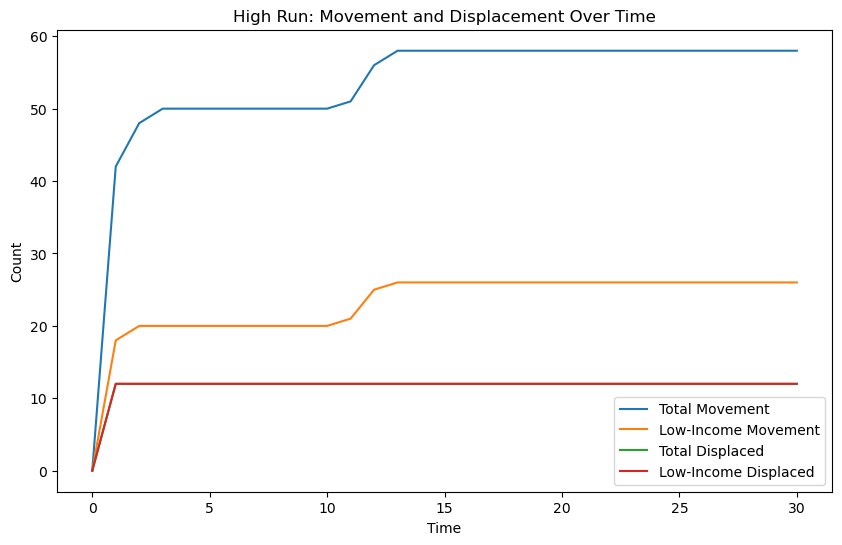

In [13]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model_out['movement'], label='Total Movement')
plt.plot(model_out['li_movement'], label='Low-Income Movement')
plt.plot(model_out['displaced'], label='Total Displaced')
plt.plot(model_out['li_displaced'], label='Low-Income Displaced')
plt.title('High Run: Movement and Displacement Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


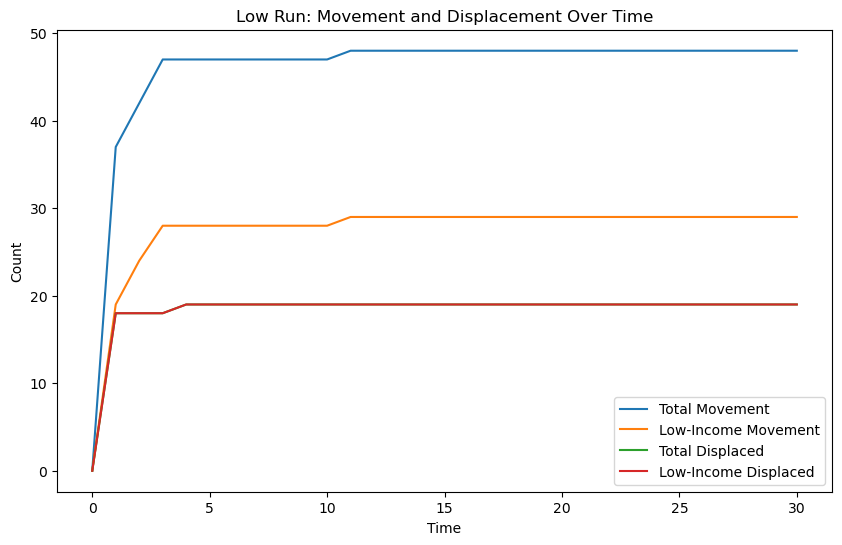

In [20]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model2_out['movement'], label='Total Movement')
plt.plot(model2_out['li_movement'], label='Low-Income Movement')
plt.plot(model2_out['displaced'], label='Total Displaced')
plt.plot(model2_out['li_displaced'], label='Low-Income Displaced')
plt.title('Low Run: Movement and Displacement Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

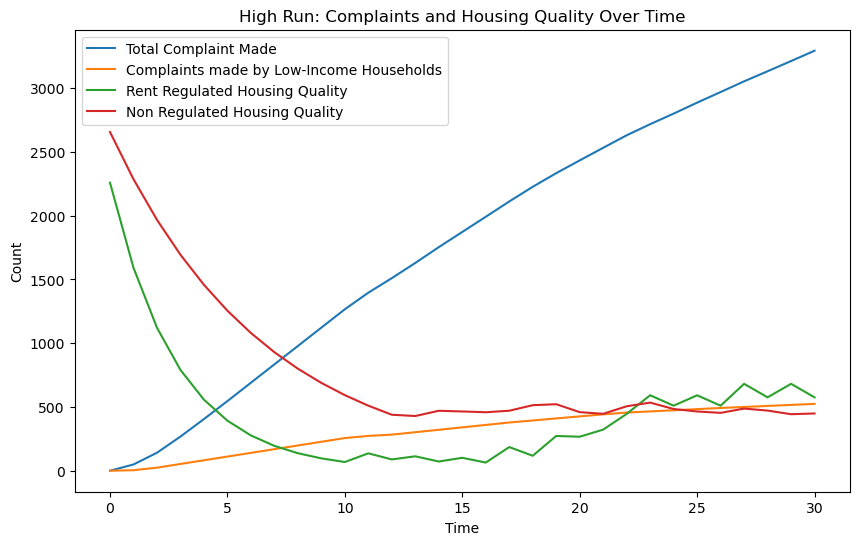

In [19]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model_out['complaints'], label='Total Complaint Made')
plt.plot(model_out['li_complaints'], label='Complaints made by Low-Income Households')
plt.plot(model_out['regulated_quality'], label='Rent Regulated Housing Quality')
plt.plot(model_out['quality'], label='Non Regulated Housing Quality')
plt.title('High Run: Complaints and Housing Quality Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


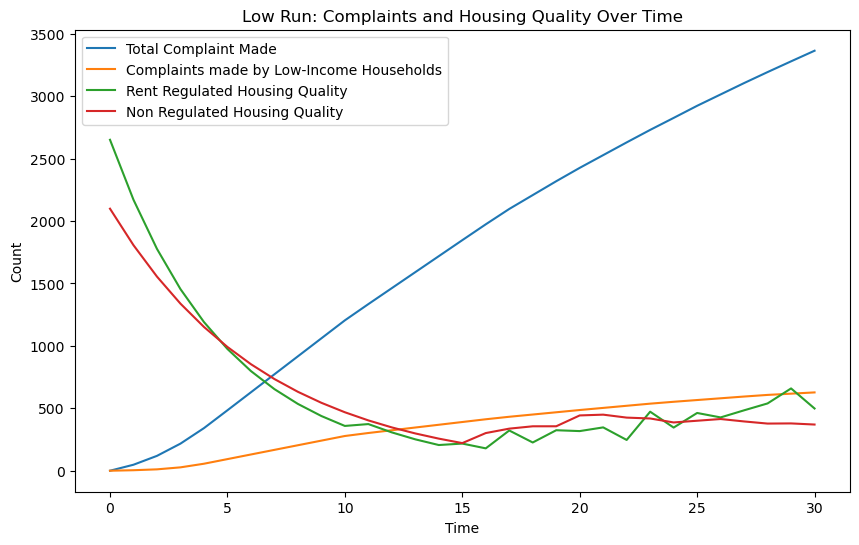

In [18]:
import matplotlib.pyplot as plt

# Assuming 'time' or a similar column exists for indexing; if not, adjust accordingly.
plt.figure(figsize=(10, 6))
plt.plot(model2_out['complaints'], label='Total Complaint Made')
plt.plot(model2_out['li_complaints'], label='Complaints made by Low-Income Households')
plt.plot(model2_out['regulated_quality'], label='Rent Regulated Housing Quality')
plt.plot(model2_out['quality'], label='Non Regulated Housing Quality')
plt.title('Low Run: Complaints and Housing Quality Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


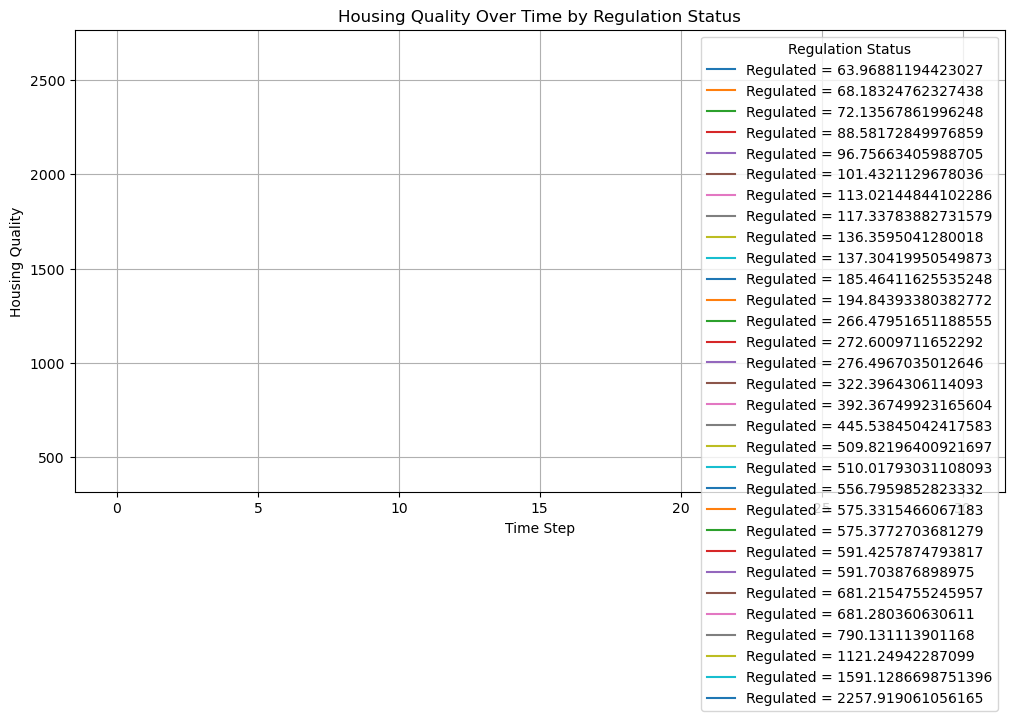

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the plot
plt.figure(figsize=(12, 6))
for label, df in model_out.groupby('regulated_quality'):
    plt.plot(df.index, df['quality'], label=f'Regulated = {label}')

plt.title('Housing Quality Over Time by Regulation Status')
plt.xlabel('Time Step')
plt.ylabel('Housing Quality')
plt.legend(title='Regulation Status')
plt.grid(True)
plt.show()


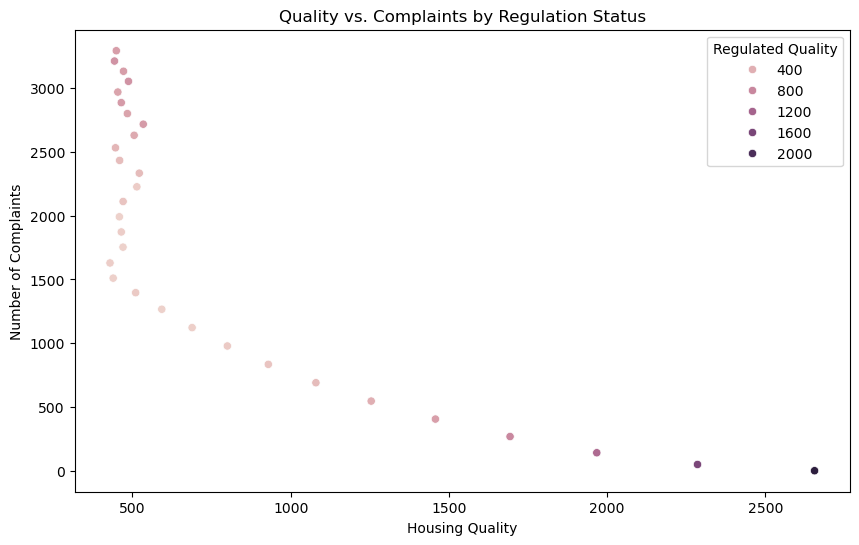

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_out, x='quality', y='complaints', hue='regulated_quality')
plt.title('Quality vs. Complaints by Regulation Status')
plt.xlabel('Housing Quality')
plt.ylabel('Number of Complaints')
plt.legend(title='Regulated Quality')
plt.show()


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7044590f29d0>


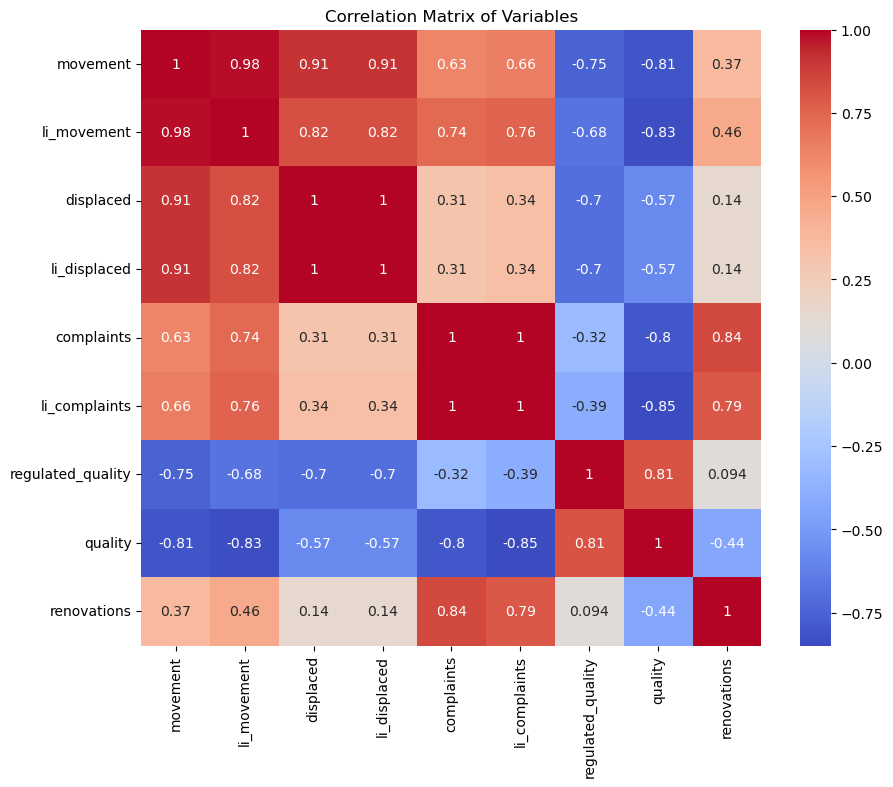

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(model_out.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


In [24]:
model2_out.head(20)

,movement,li_movement,displaced,li_displaced,complaints,li_complaints,regulated_quality,quality,renovations
0,0,0,0,0,0,0,2447.337865,1952.765173,0
1,45,28,9,9,57,2,2106.443221,1598.788900,0
2,50,31,10,10,131,9,1813.032482,1308.977640,0
3,50,31,10,10,237,32,1560.491519,1071.700249,0
4,50,31,10,10,356,58,1343.127498,877.433952,0
5,50,31,10,10,489,89,1156.040550,718.382160,0
6,50,31,10,10,636,129,995.013323,588.161567,0
7,50,31,10,10,783,169,856.415904,481.545963,0
8,50,31,10,10,930,209,737.123999,394.256489,0
9,50,31,10,10,1077,249,634.448506,322.789912,0


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/hai/anaconda3/envs/abm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11

<Axes: >

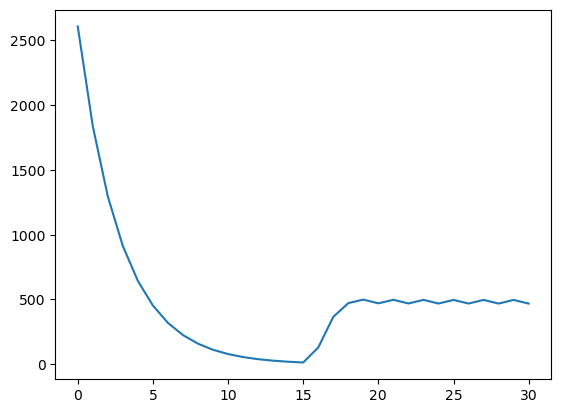

In [25]:
model_out.quality.plot()

<Axes: >

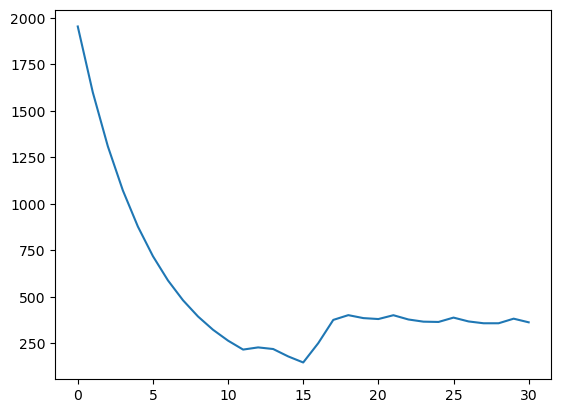

In [26]:
model2_out.quality.plot()

In [27]:
from mesa import batch_run
import numpy as np
import pandas as pd

# NOTE: You do not need this as a separate file BUT it can be nice to track
# can also call the file and it makes things a little cleaner as it runs

# Here you will have elements that you want to sweep, eg:
# parameters that will remain constant
# parameters you want to vary
parameters = {"rent_discount": 0.5,
              "init_num_people": 2,
              "base_decay_constant": 0.15,
              "decay_differential": np.linspace(0,0.5, 6),
              "max_complaint": range(2,8,1)} 


In [29]:
results = batch_run(GeoHousing, 
                    parameters,
                    iterations=50,  
                    max_steps=30, 
                    data_collection_period = 1,
                    number_processes = 6) #how often do you want to pull the data





## NOTE: to do data collection, you need to be sure your pathway is correct to save this!
# Data collection
# extract data as a pandas Data Frame
pd.DataFrame(results).to_csv("batch_data.csv")



  0%|          | 0/1800 [00:00<?, ?it/s]

DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:GDAL_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona._env:PROJ_DATA found in environment.
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona._env:GDAL_DATA f

KeyboardInterrupt: 

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [14]:
param_sweep.run_all()

80it [00:15,  3.13it/s]


In [15]:
df = param_sweep.get_model_vars_dataframe()

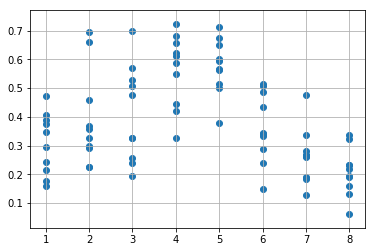

In [16]:
plt.scatter(df.homophily, df.Segregated_Agents)
plt.grid(True)